In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("AL_NJ_Income_PCT.csv")

In [67]:
df.head(10)

,STATEFIPS,STATE,zipcode,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6,total
0,1,AL,35004,28.98,27.06,18.23,12.48,12.09,1.15,5210
1,1,AL,35005,42.26,30.97,14.52,6.45,5.81,0.00,3100
2,1,AL,35006,35.83,27.50,15.83,10.00,10.83,0.00,1200
3,1,AL,35007,34.09,22.19,15.24,11.22,15.24,2.01,11940
4,1,AL,35010,45.76,26.17,11.25,6.70,7.84,2.28,7910
5,1,AL,35014,40.74,28.40,12.96,8.64,7.41,1.85,1620
6,1,AL,35016,39.41,24.26,14.87,9.54,10.10,1.82,7130
7,1,AL,35019,40.45,28.09,15.73,6.74,8.99,0.00,890
8,1,AL,35020,60.22,27.29,7.96,2.54,1.77,0.22,9050
9,1,AL,35022,33.06,24.80,16.43,10.41,13.27,2.04,9800


In [68]:
df.describe()

,STATEFIPS,zipcode,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6,total
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,17.287918,22125.734362,36.524944,22.808278,13.709623,8.803059,13.122545,5.031482,5404.841474
std,16.505710,14031.503677,10.450633,5.924677,4.229686,3.212244,7.552240,7.769220,5997.633563
min,1.000000,7001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,1.000000,7976.500000,27.915000,18.825000,11.850000,7.215000,7.460000,0.000000,1115.000000
50%,1.000000,35019.000000,35.860000,23.910000,13.830000,9.130000,11.900000,1.700000,3300.000000
75%,34.000000,36011.500000,43.025000,27.020000,15.540000,10.810000,19.660000,5.910000,7530.000000
max,34.000000,36925.000000,72.260000,44.000000,100.000000,23.080000,34.880000,51.210000,32070.000000


In [69]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATEFIPS     1167 non-null   int64  
 1   STATE         1167 non-null   object 
 2   zipcode       1167 non-null   int64  
 3   Returns_pct1  1167 non-null   float64
 4   Returns_pct2  1167 non-null   float64
 5   Returns_pct3  1167 non-null   float64
 6   Returns_pct4  1167 non-null   float64
 7   Returns_pct5  1167 non-null   float64
 8   Returns_pct6  1167 non-null   float64
 9   total         1167 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 91.3+ KB


In [70]:
df.isnull().sum()

STATEFIPS       0
STATE           0
zipcode         0
Returns_pct1    0
Returns_pct2    0
Returns_pct3    0
Returns_pct4    0
Returns_pct5    0
Returns_pct6    0
total           0
dtype: int64

In [71]:
df.shape

(1167, 10)

In [72]:
df["STATEFIPS"].value_counts()

1     591
34    576
Name: STATEFIPS, dtype: int64

In [73]:
df["STATE"].value_counts()

AL    591
NJ    576
Name: STATE, dtype: int64

In [74]:
df["zipcode"]

0       35004
1       35005
2       35006
3       35007
4       35010
        ...  
1162     8887
1163     8889
1164     8901
1165     8902
1166     8904
Name: zipcode, Length: 1167, dtype: int64

In [75]:
df_returns = df[['Returns_pct1', 'Returns_pct2', 'Returns_pct3', 'Returns_pct4', 'Returns_pct5', 'Returns_pct6']]
df_returns.head()

,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6
0,28.98,27.06,18.23,12.48,12.09,1.15
1,42.26,30.97,14.52,6.45,5.81,0.00
2,35.83,27.50,15.83,10.00,10.83,0.00
3,34.09,22.19,15.24,11.22,15.24,2.01
4,45.76,26.17,11.25,6.70,7.84,2.28


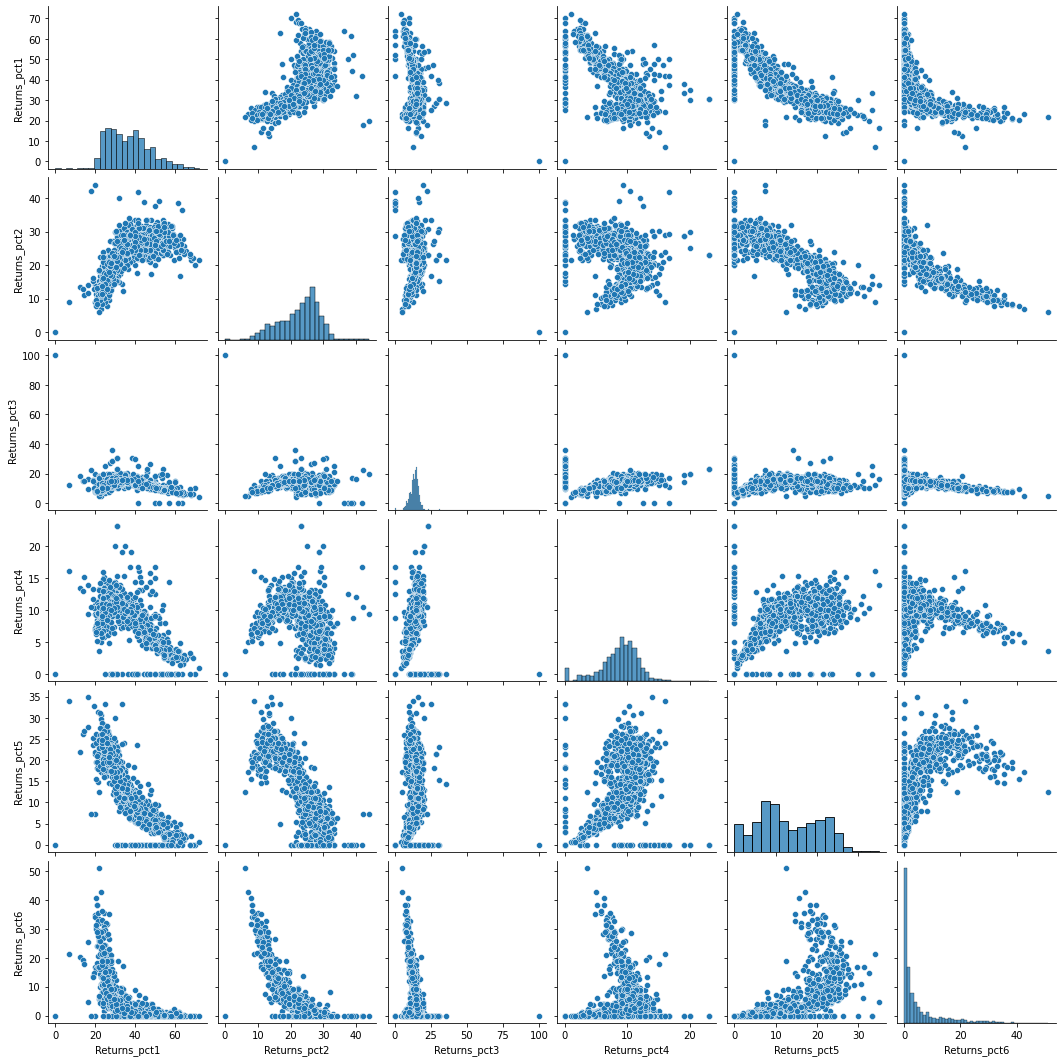

In [76]:
sns.pairplot(df_returns,kind='scatter')

In [77]:
from sklearn.cluster import KMeans
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [78]:
# Creating an object for the StandardScaler function
X = StandardScaler()


In [79]:
df_returns_scaled = X.fit_transform(df_returns.iloc[:,:])

In [80]:
df_returns_scaled

array([[-0.72227005,  0.71793711,  1.06918454,  1.14515513, -0.13677898,
        -0.49981166],
       [ 0.54901121,  1.37817168,  0.19167485, -0.73284228, -0.96867688,
        -0.64789514],
       [-0.06652633,  0.7922346 ,  0.50152328,  0.37277809, -0.30368843,
        -0.64789514],
       ...,
       [ 1.32537349,  1.23464242, -0.83484591, -1.53013471, -1.18062538,
        -0.4895102 ],
       [-0.65621704, -0.02503786,  0.23188419,  0.45686752,  0.52556011,
         0.07578237],
       [-0.82565739, -0.36275375,  0.21769266,  0.35720597,  0.57987191,
         0.55608791]])

In [81]:
model = KMeans(n_clusters = 2, random_state=42)

In [82]:
y_kmeans = model.fit_predict(df_returns_scaled)

In [83]:
y_kmeans

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [84]:
#crosstab

ct = pd.crosstab(y_kmeans, df['STATE'])
print(ct)

STATE   AL   NJ
row_0          
0       68  405
1      523  171


In [85]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.cluster import AgglomerativeClustering 

In [86]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [87]:
model.fit(df_returns_scaled)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [88]:
Z = linkage(df_returns_scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(df_returns_scaled))

c

0.5621807915483165

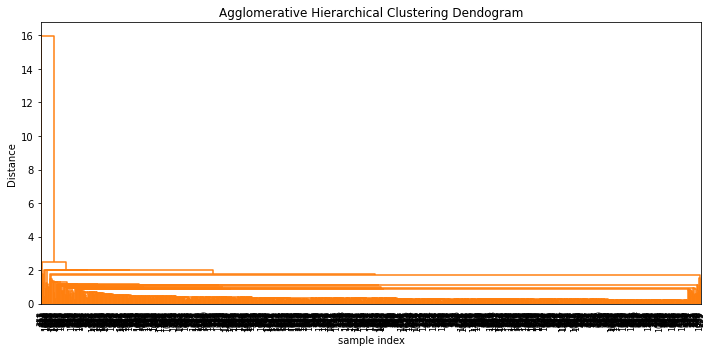

In [89]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [90]:
df.head()

,STATEFIPS,STATE,zipcode,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6,total
0,1,AL,35004,28.98,27.06,18.23,12.48,12.09,1.15,5210
1,1,AL,35005,42.26,30.97,14.52,6.45,5.81,0.00,3100
2,1,AL,35006,35.83,27.50,15.83,10.00,10.83,0.00,1200
3,1,AL,35007,34.09,22.19,15.24,11.22,15.24,2.01,11940
4,1,AL,35010,45.76,26.17,11.25,6.70,7.84,2.28,7910


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


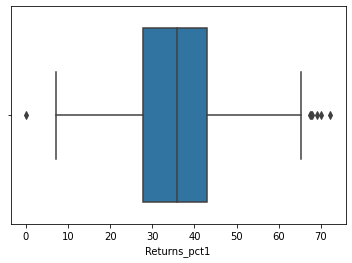

In [96]:
#checking outliers for Returns_pct1 
sns.boxplot(df['Returns_pct1'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


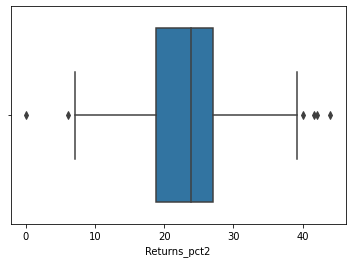

In [97]:
#checking outliers for Returns_pct2 
sns.boxplot(df['Returns_pct2'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


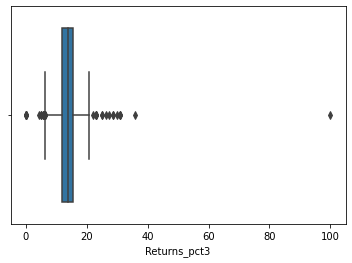

In [98]:
#checking outliers for Returns_pct3
sns.boxplot(df['Returns_pct3'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


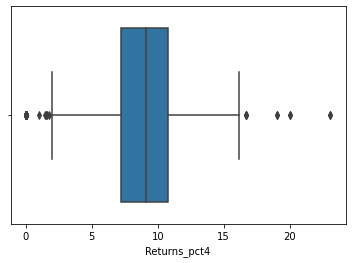

In [99]:
#checking outliers for Returns_pct4
sns.boxplot(df['Returns_pct4'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


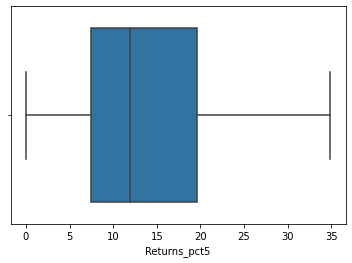

In [100]:
#checking outliers for Returns_pct5
sns.boxplot(df['Returns_pct5'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


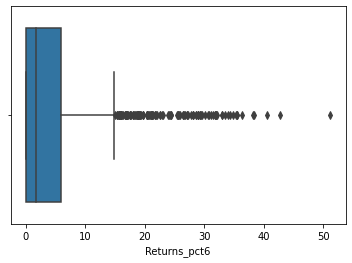

In [101]:
#checking outliers for Returns_pct6
sns.boxplot(df['Returns_pct6'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


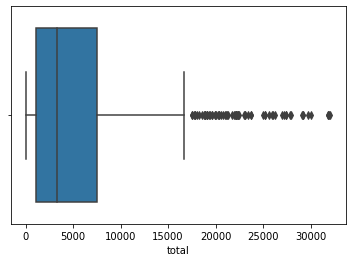

In [102]:
#checking outliers for total
sns.boxplot(df['total'])

In [103]:
# columns which has outliers: total, Returns_pct6, Returns_pct4, Returns_pct3, Returns_pct2, Returns_pct1
#columns which dont have outliers: Returns_pct2